In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import sklearn.decomposition as decomposition

In [2]:
sklearn.__version__

'0.22.1'

# 1. Classifying breast cancer image data with logistic regression

In this problem, you will classify whether cells in the given breast cancer cell image are malignant or benign. There are 58 images and their truth label, which is 1 for malignant and 0 for benign. 

In [3]:
# Load data
data = pickle.load(open('breast_cancer_data.pkl', 'rb'))
train_img = data['train_img']
test_img = data['test_img']
train_lbl = data['train_lbl']
test_lbl = data['test_lbl']

In [4]:
train_img.shape

(46, 768, 896, 3)

Let's take a quick look at the malignant and benign images.

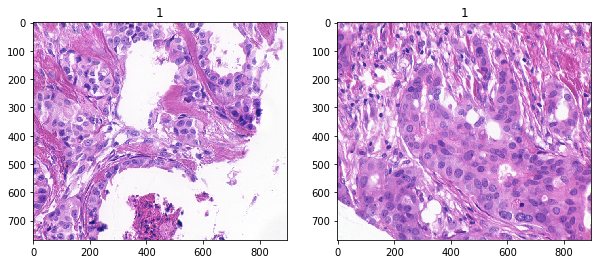

In [5]:
# Visualize images
i_1 = 0
i_2 = 6
mal_ind = np.nonzero(train_lbl)
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].imshow(train_img[i_1])
ax[0].set_title(str(train_lbl[i_1]))
ax[1].imshow(train_img[i_2])
ax[1].set_title(str(train_lbl[i_2]))
plt.show()

The dimension of this image is $N_{row}$ x $N_{column}$ x 3, where last dimension corresponds to red, gree, and blue channels.

In [6]:
train_img[0].shape

(768, 896, 3)

### Problem 1.a - fit a logistic regression model on the image and report:
- mean accuracy
- balanced accuracy
- ROC curve with AUC

on the test set data. You may want to play with different regularization.

In [7]:
## preprocess data (flattening to a vector)
train_img_reshaped = train_img.reshape(len(train_img), -1) 
test_img_reshaped = test_img.reshape(len(test_img), -1) 

In [8]:
## train 
max_iter = 500
# Since this is a small dataset, using liblinear solver with L2 normalization
log_reg = LogisticRegression(solver = "liblinear", max_iter=max_iter)
log_reg.fit(train_img_reshaped, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy Score (mean accuracy): 0.8333333333333334
Balanced Accuracy Score: 0.8
ROC AUC: 0.6571428571428571


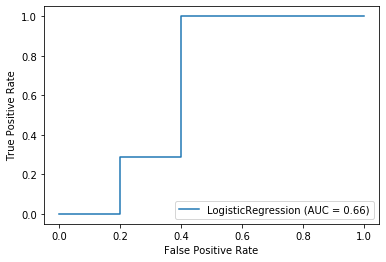

In [9]:
## evaluate
def log_reg_metrics(model, test_data, test_lbl):
    """Given a trained sklearn logistic regression model (binary case only), prints multiple performance metrics
    as well as a ROC curve"""
    est_lbl = model.predict(test_data)
    est_scores = model.decision_function(test_data)
    mean_acc = metrics.accuracy_score(test_lbl, est_lbl)
    bal_acc = metrics.balanced_accuracy_score(test_lbl, est_lbl)
    roc_points = metrics.roc_curve(test_lbl, est_scores)
    auc = metrics.roc_auc_score(test_lbl, est_scores)
    print("Accuracy Score (mean accuracy): " + str(mean_acc))
    print("Balanced Accuracy Score: " + str(bal_acc))
    print("ROC AUC: " + str(auc))
    # For some reason conda/python is not recognizing this as a package, even though it is very much a package
    metrics.plot_roc_curve(model, test_data, test_lbl)
    plt.show()
    
    return None
    
log_reg_metrics(log_reg, test_img_reshaped, test_lbl)

### Problem 1.b - do the above exercise again with downsampled images

In [10]:
## preprocess data
from skimage.measure import block_reduce # you are welcome to use other methods

ds_train_img = block_reduce(train_img, block_size=(1, 3, 3, 1), func=np.mean)
ds_test_img = block_reduce(test_img, block_size=(1, 3, 3, 1), func=np.mean)
                       
ds_train_img_reshaped = ds_train_img.reshape(len(ds_train_img), -1) 
ds_test_img_reshaped = ds_test_img.reshape(len(ds_test_img), -1) 

In [11]:
## train 
max_iter = 500
# Since this is a small dataset, using liblinear solver with L2 normalization
log_reg_2 = LogisticRegression(solver = "liblinear", max_iter=max_iter)
log_reg_2.fit(ds_train_img_reshaped, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy Score (mean accuracy): 0.8333333333333334
Balanced Accuracy Score: 0.8
ROC AUC: 0.6571428571428571


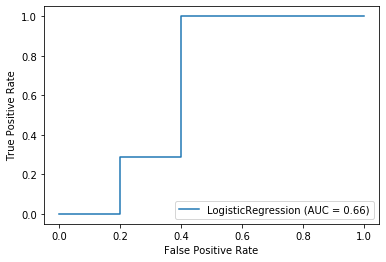

In [12]:
## evaluate
log_reg_metrics(log_reg_2, ds_test_img_reshaped, test_lbl)

### Problem 1.c - ...and again with top principle components

In [15]:
## preprocess data
pca = decomposition.PCA()
pca

## train 


## evaluate

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Problem 1.d - show scatter plots of top 2 principle components for both malignant and benign train set images.

### Problem 1.e - Discuss what you have learned !
(e.g., does regularization or data processing steps affect classification result? What does the scatter plot of 1.d inform you about this classification task?)